# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# LOADING DATASET

In [81]:
df= pd.read_csv('globalterrorismdb_0718dist.csv')
df.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# EXPLORATORY DATA ANALYSIS

In [3]:
#CHECKING FOR THE NUMBER OF FEATURES
df.shape

(181691, 135)

PROCEDURE
Due to the large number of features present in the dataset, for us to see all columns and understand the feaures properly we would split the dataset into seven groups, then call the df.columns, df.nunique(), df.corr(),df.isna().sum() functions and plot the heapmap for each group. This will provide us with information regarding the redundant features that needs to be dropped.

In [25]:
#FIRST GROUP
df1 = df.iloc[:,0:21]
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1


In [26]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2'],
      dtype='object')

In [27]:
df1.nunique()

eventid        181691
iyear              47
imonth             13
iday               32
approxdate       2244
extended            2
resolution       1859
country           205
country_txt       205
region             12
region_txt         12
provstate        2854
city            36674
latitude        48322
longitude       48039
specificity         5
vicinity            3
location        44109
summary        112492
crit1               2
crit2               2
dtype: int64

In [28]:
df1.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
region_txt          0
provstate         421
city              434
latitude         4556
longitude        4557
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
crit2               0
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
['approxdate','resolution','location']

In [29]:
df1.count()

eventid        181691
iyear          181691
imonth         181691
iday           181691
approxdate       9239
extended       181691
resolution       2220
country        181691
country_txt    181691
region         181691
region_txt     181691
provstate      181270
city           181257
latitude       177135
longitude      177134
specificity    181685
vicinity       181691
location        55495
summary        115562
crit1          181691
crit2          181691
dtype: int64

In [34]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
region,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
latitude,177135.0,2.349834e+01,1.856924e+01,-5.315461e+01,1.151005e+01,3.146746e+01,3.468509e+01,7.463355e+01
longitude,177134.0,-4.586957e+02,2.047790e+05,-8.618590e+07,4.545640e+00,4.324651e+01,6.871033e+01,1.793667e+02
specificity,181685.0,1.451452e+00,9.954295e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [35]:
df1.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,0.178567,-0.000269,-0.084599,-0.012291,-0.006646,-0.038480
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.309274,0.004351,-0.084198,0.073678,0.025521,-0.013163
latitude,0.166886,0.166933,-0.015978,0.003423,-0.024749,0.178567,0.309274,1.000000,0.001463,-0.018811,0.005844,0.021533,-0.004104
longitude,0.003907,0.003917,-0.003880,-0.002285,0.000523,-0.000269,0.004351,0.001463,1.000000,0.001065,0.000594,-0.000258,-0.000200
specificity,0.030641,0.030626,0.003621,-0.006991,0.057897,-0.084599,-0.084198,-0.018811,0.001065,1.000000,-0.049855,0.014323,0.000943


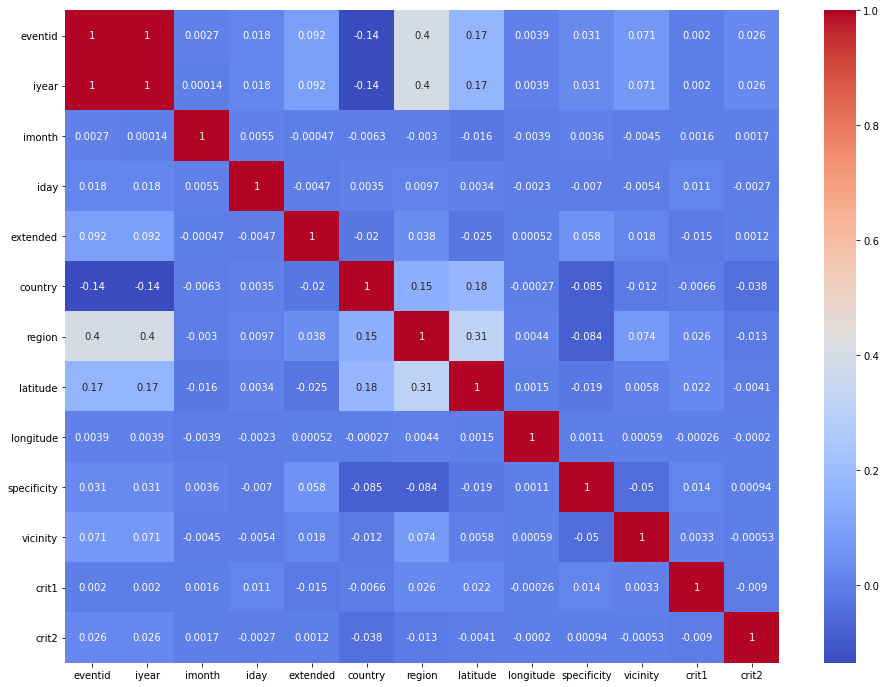

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [ ]:
#from the heatmap region has a slight correlation with eventid

In [30]:
#GROUP 2
df2 = df.iloc[:,21:41]
df2.head()

,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1
0,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0
1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0
2,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0
3,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0
4,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0


In [31]:
df2.columns

Index(['crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1'],
      dtype='object')

In [32]:
df2.nunique()

crit3                   2
doubtterr               3
alternative             5
alternative_txt         5
multiple                2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
attacktype2             9
attacktype2_txt         9
attacktype3             8
attacktype3_txt         8
targtype1              22
targtype1_txt          22
targsubtype1          112
targsubtype1_txt      112
corp1               33238
target1             86006
natlty1               215
dtype: int64

In [33]:
df2.isna().sum()

crit3                    0
doubtterr                1
alternative         152680
alternative_txt     152680
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
attacktype3         181263
attacktype3_txt     181263
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1               1559
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
['alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt']

In [37]:
df2.corr()

,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1
crit3,1.000000,-0.233282,0.733615,0.047007,-0.013678,-0.026620,0.028124,0.209391,0.033674,0.251296,0.196012,-0.083928
doubtterr,-0.233282,1.000000,-0.013380,0.046812,-0.028236,0.056836,-0.068122,-0.173796,-0.004277,0.004962,0.006850,0.039491
alternative,0.733615,-0.013380,1.000000,-0.000581,0.017800,-0.051333,0.019050,0.235857,0.117348,0.639119,0.594301,0.005742
multiple,0.047007,0.046812,-0.000581,1.000000,0.020310,0.030750,0.081873,0.152746,0.173649,0.079643,0.080906,-0.013767
success,-0.013678,-0.028236,0.017800,0.020310,1.000000,-0.031155,0.048408,0.061879,0.086364,-0.059637,0.038192,-0.007157
suicide,-0.026620,0.056836,-0.051333,0.030750,-0.031155,1.000000,-0.029962,-0.215342,-0.431717,-0.023440,-0.029521,-0.009207
attacktype1,0.028124,-0.068122,0.019050,0.081873,0.048408,-0.029962,1.000000,-0.314973,-0.117710,0.014513,0.022159,0.013769
attacktype2,0.209391,-0.173796,0.235857,0.152746,0.061879,-0.215342,-0.314973,1.000000,-0.357378,0.202041,0.199101,0.007363
attacktype3,0.033674,-0.004277,0.117348,0.173649,0.086364,-0.431717,-0.117710,-0.357378,1.000000,0.248869,0.252763,0.041005
targtype1,0.251296,0.004962,0.639119,0.079643,-0.059637,-0.023440,0.014513,0.202041,0.248869,1.000000,0.982772,-0.034994


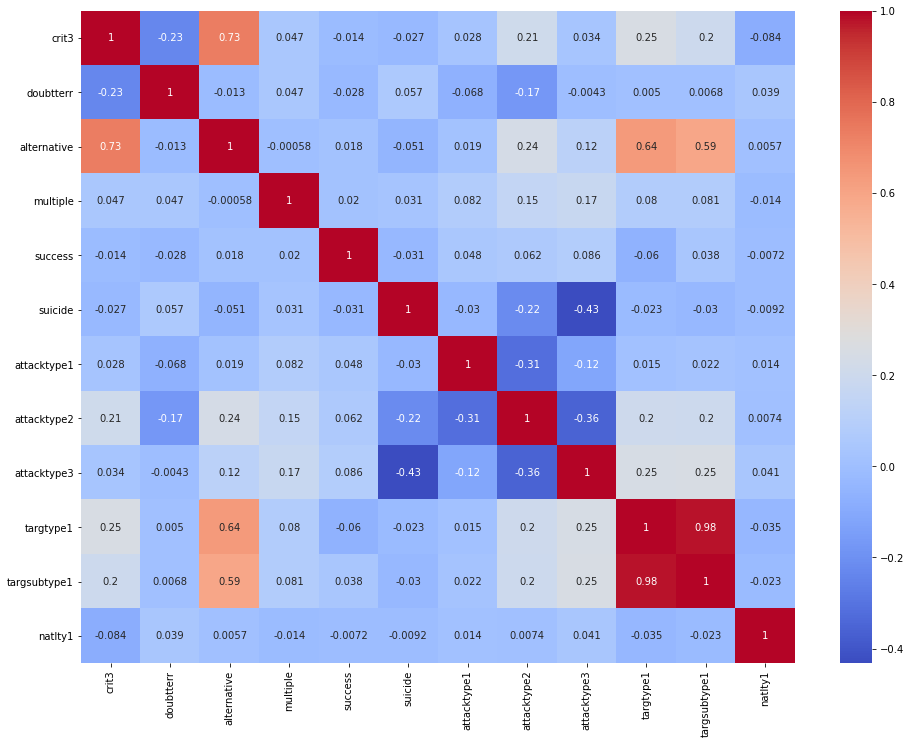

In [38]:
plt.figure(figsize=(16,12))
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [ ]:
#From the heatmap crit3 is correlated to alternative, also alternative is correlated to targtype1

In [39]:
#GROUP 3
df3 = df.iloc[:,41:61]
df3.head()

,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2
0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN
2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
4,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN


In [40]:
df3.columns

Index(['natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname',
       'gname2'],
      dtype='object')

In [41]:
df3.isna().sum()

natlty1_txt           1559
targtype2           170547
targtype2_txt       170547
targsubtype2        171006
targsubtype2_txt    171006
corp2               171574
target2             170671
natlty2             170863
natlty2_txt         170863
targtype3           180515
targtype3_txt       180515
targsubtype3        180594
targsubtype3_txt    180594
corp3               180665
target3             180516
natlty3             180544
natlty3_txt         180544
gname                    0
gsubname            175801
gname2              179678
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
['targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname',
       'gname2']

In [44]:
df3.nunique()

natlty1_txt          215
targtype2             22
targtype2_txt         22
targsubtype2         107
targsubtype2_txt     107
corp2               2691
target2             5043
natlty2              158
natlty2_txt          158
targtype3             20
targtype3_txt         20
targsubtype3          92
targsubtype3_txt      92
corp3                422
target3              720
natlty3              110
natlty3_txt          110
gname               3537
gsubname            1183
gname2               433
dtype: int64

In [43]:
df3.corr()

,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3
targtype2,1.000000,0.972827,-0.035200,0.240236,0.259510,0.030995
targsubtype2,0.972827,1.000000,-0.021441,0.270355,0.305731,0.014169
natlty2,-0.035200,-0.021441,1.000000,-0.039912,-0.022512,0.323694
targtype3,0.240236,0.270355,-0.039912,1.000000,0.975187,0.006638
targsubtype3,0.259510,0.305731,-0.022512,0.975187,1.000000,0.001019
natlty3,0.030995,0.014169,0.323694,0.006638,0.001019,1.000000


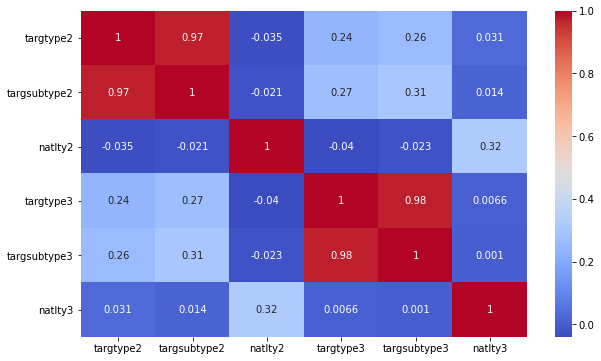

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df3.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [46]:
#GROUP 4
df4 = df.iloc[:,61:81]
df4.head()

,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df4.columns

Index(['gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'],
      dtype='object')

In [48]:
df4.isna().sum()

gsubname2         181531
gname3            181367
gsubname3         181671
motive            131130
guncertain1          380
guncertain2       179736
guncertain3       181371
individual             0
nperps             71115
nperpcap           69489
claimed            66120
claimmode         162608
claimmode_txt     162608
claim2            179801
claimmode2        181075
claimmode2_txt    181075
claim3            181373
claimmode3        181558
claimmode3_txt    181558
compclaim         176852
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
['gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim']

In [49]:
df4.nunique()

gsubname2            60
gname3              116
gsubname3            14
motive            14490
guncertain1           2
guncertain2           2
guncertain3           2
individual            2
nperps              113
nperpcap             50
claimed               3
claimmode            10
claimmode_txt        10
claim2                3
claimmode2            9
claimmode2_txt        9
claim3                2
claimmode3            8
claimmode3_txt        8
compclaim             3
dtype: int64

In [50]:
df4.corr()

,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim
guncertain1,1.000000,0.601330,0.521324,-0.000614,-0.002415,-0.018101,-0.042083,0.025651,-0.081652,-0.043828,0.067949,-0.098171,0.020751
guncertain2,0.601330,1.000000,0.602797,0.037630,-0.006112,-0.060473,-0.138330,0.016028,-0.102625,-0.062487,0.104466,0.164162,-0.142454
guncertain3,0.521324,0.602797,1.000000,NaN,0.107850,0.092288,-0.173625,0.138413,-0.023028,0.174932,-0.018241,0.263977,0.007632
individual,-0.000614,0.037630,NaN,1.000000,0.020067,0.011036,0.028876,0.009392,-0.005851,NaN,NaN,NaN,-0.016101
nperps,-0.002415,-0.006112,0.107850,0.020067,1.000000,0.022733,-0.011764,-0.005658,-0.016653,0.058310,-0.094615,0.214576,-0.238071
nperpcap,-0.018101,-0.060473,0.092288,0.011036,0.022733,1.000000,0.004231,0.091539,-0.028962,0.026740,-0.043835,-0.093756,-0.126868
claimed,-0.042083,-0.138330,-0.173625,0.028876,-0.011764,0.004231,1.000000,-0.036218,0.350384,-0.049181,0.131331,0.142088,0.383212
claimmode,0.025651,0.016028,0.138413,0.009392,-0.005658,0.091539,-0.036218,1.000000,-0.058337,0.584601,-0.130080,0.544986,0.067994
claim2,-0.081652,-0.102625,-0.023028,-0.005851,-0.016653,-0.028962,0.350384,-0.058337,1.000000,0.004339,0.534154,0.142088,0.148490
claimmode2,-0.043828,-0.062487,0.174932,NaN,0.058310,0.026740,-0.049181,0.584601,0.004339,1.000000,-0.077505,0.725724,-0.025029


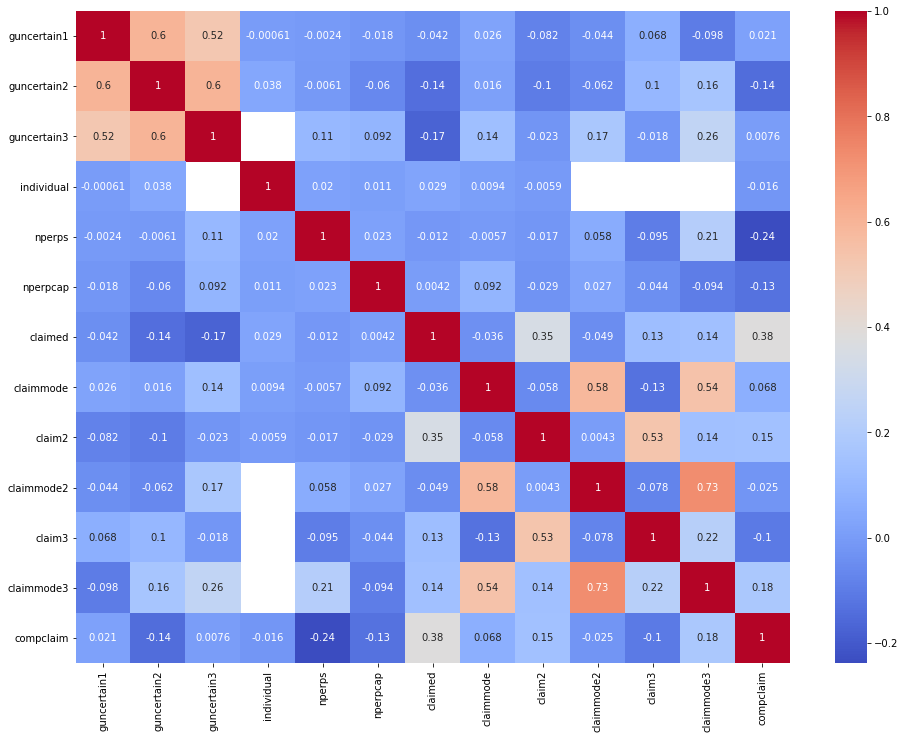

In [51]:
plt.figure(figsize=(16,12))
sns.heatmap(df4.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [52]:
#GROUP 5
df5 = df.iloc[:,81:101]
df5.head()

,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter
0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN
4,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN


In [53]:
df5.columns

Index(['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter'],
      dtype='object')

In [54]:
df5.isna().sum()

weaptype1                0
weaptype1_txt            0
weapsubtype1         20768
weapsubtype1_txt     20768
weaptype2           168564
weaptype2_txt       168564
weapsubtype2        170149
weapsubtype2_txt    170149
weaptype3           179828
weaptype3_txt       179828
weapsubtype3        179998
weapsubtype3_txt    179998
weaptype4           181618
weaptype4_txt       181618
weapsubtype4        181621
weapsubtype4_txt    181621
weapdetail           67670
nkill                10313
nkillus              64446
nkillter             66958
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
[
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt']

In [55]:
df5.nunique()

weaptype1              12
weaptype1_txt          12
weapsubtype1           30
weapsubtype1_txt       30
weaptype2              11
weaptype2_txt          11
weapsubtype2           28
weapsubtype2_txt       28
weaptype3              10
weaptype3_txt          10
weapsubtype3           22
weapsubtype3_txt       22
weaptype4               5
weaptype4_txt           5
weapsubtype4           16
weapsubtype4_txt       16
weapdetail          19148
nkill                 205
nkillus                31
nkillter               96
dtype: int64

In [56]:
df5.corr()

,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter
weaptype1,1.000000,0.740493,0.140756,-0.059619,0.003986,-0.112474,0.056901,0.148021,0.004038,0.006908,0.042380
weapsubtype1,0.740493,1.000000,0.032709,-0.160508,0.005872,-0.095073,0.015669,0.009337,-0.070077,-0.001019,-0.036062
weaptype2,0.140756,0.032709,1.000000,0.911113,0.261191,0.274309,0.167278,0.271454,0.015878,0.005618,0.011324
weapsubtype2,-0.059619,-0.160508,0.911113,1.000000,0.190946,0.145600,0.072537,0.178127,0.010108,0.017787,-0.046590
weaptype3,0.003986,0.005872,0.261191,0.190946,1.000000,0.953294,0.254143,0.411955,0.026288,0.035091,-0.087847
weapsubtype3,-0.112474,-0.095073,0.274309,0.145600,0.953294,1.000000,0.447902,0.337638,0.018314,0.052181,-0.135906
weaptype4,0.056901,0.015669,0.167278,0.072537,0.254143,0.447902,1.000000,0.838155,0.093517,-0.200000,-0.130892
weapsubtype4,0.148021,0.009337,0.271454,0.178127,0.411955,0.337638,0.838155,1.000000,0.103275,-0.247953,-0.595013
nkill,0.004038,-0.070077,0.015878,0.010108,0.026288,0.018314,0.093517,0.103275,1.000000,0.487535,0.412111
nkillus,0.006908,-0.001019,0.005618,0.017787,0.035091,0.052181,-0.200000,-0.247953,0.487535,1.000000,0.004968


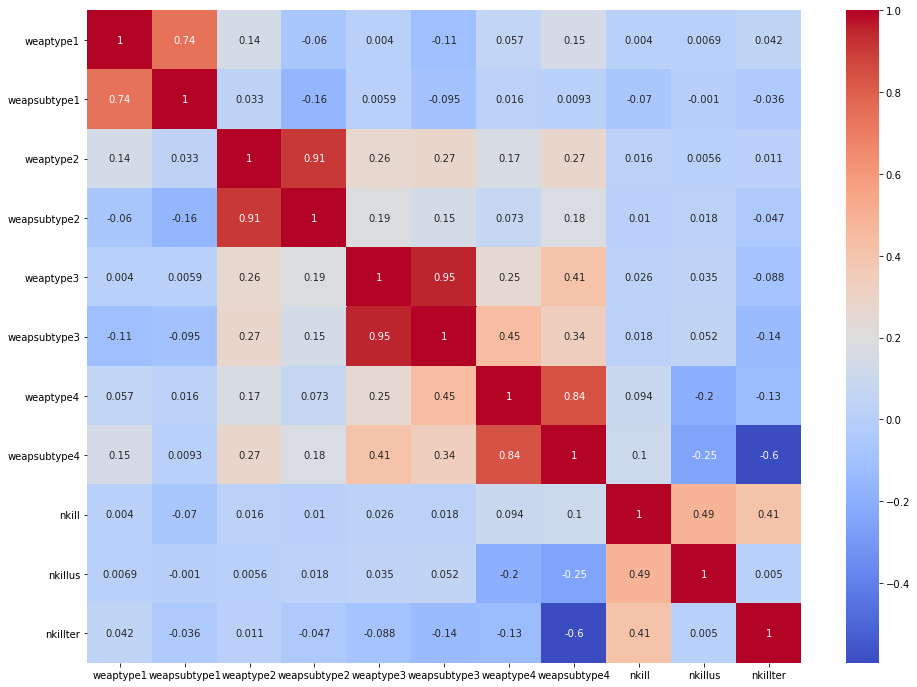

In [57]:
plt.figure(figsize=(16,12))
sns.heatmap(df5.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [58]:
#GROUP 6
df6 = df.iloc[:,101:121]
df6.head()

,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN
2,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [59]:
df6.columns

Index(['nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'],
      dtype='object')

In [60]:
df6.isna().sum()

nwound             16311
nwoundus           64702
nwoundte           69143
property               0
propextent        117626
propextent_txt    117626
propvalue         142702
propcomment       123732
ishostkid            178
nhostkid          168119
nhostkidus        168174
nhours            177628
ndays             173567
divert            181367
kidhijcountry     178386
ransom            104310
ransomamt         180341
ransomamtus       181128
ransompaid        180917
ransompaidus      181139
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
['propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus']

In [61]:
df6.nunique()

nwound              238
nwoundus             44
nwoundte             44
property              3
propextent            4
propextent_txt        4
propvalue           659
propcomment       19157
ishostkid             3
nhostkid            209
nhostkidus           27
nhours               35
ndays               328
divert              143
kidhijcountry       217
ransom                3
ransomamt           429
ransomamtus          23
ransompaid          156
ransompaidus          8
dtype: int64

In [62]:
df6.corr()

,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus
nwound,1.000000,0.152278,0.038568,-0.013406,-0.023914,0.090562,-0.001712,0.035770,0.142196,0.013731,-0.028855,0.001661,-0.002114,-0.009149,-0.012700,-0.016472
nwoundus,0.152278,1.000000,0.000225,0.004924,-0.009930,0.469664,-0.000027,0.006480,-0.103280,0.085444,0.011776,0.007730,-0.006479,-0.002853,-0.002095,-0.002435
nwoundte,0.038568,0.000225,1.000000,-0.012788,0.024351,-0.000764,-0.010300,0.002279,0.000922,0.019496,0.000018,0.012104,0.005565,NaN,-0.002819,NaN
property,-0.013406,0.004924,-0.012788,1.000000,-0.325593,0.001317,0.018890,-0.014581,0.028323,0.116160,0.035619,0.238277,0.000270,-0.027844,0.005299,0.017164
propextent,-0.023914,-0.009930,0.024351,-0.325593,1.000000,-0.054846,0.013946,0.041083,-0.058765,0.105193,0.024145,-0.099057,0.200551,0.413058,0.243261,-0.060871
propvalue,0.090562,0.469664,-0.000764,0.001317,-0.054846,1.000000,0.000273,-0.016313,0.036954,0.061712,0.036346,0.000895,-0.038233,-0.026822,-0.038802,-0.020750
ishostkid,-0.001712,-0.000027,-0.010300,0.018890,0.013946,0.000273,1.000000,0.000323,-0.000807,0.000725,0.008608,-0.160358,0.010721,NaN,-0.008226,NaN
nhostkid,0.035770,0.006480,0.002279,-0.014581,0.041083,-0.016313,0.000323,1.000000,-0.003381,0.005016,-0.003566,0.004645,0.058839,-0.008584,0.014320,-0.015470
nhostkidus,0.142196,-0.103280,0.000922,0.028323,-0.058765,0.036954,-0.000807,-0.003381,1.000000,0.018421,0.030089,0.043555,0.008505,0.011408,0.004727,0.020845
nhours,0.013731,0.085444,0.019496,0.116160,0.105193,0.061712,0.000725,0.005016,0.018421,1.000000,0.201933,0.154233,0.097667,-0.077127,0.126789,0.291390


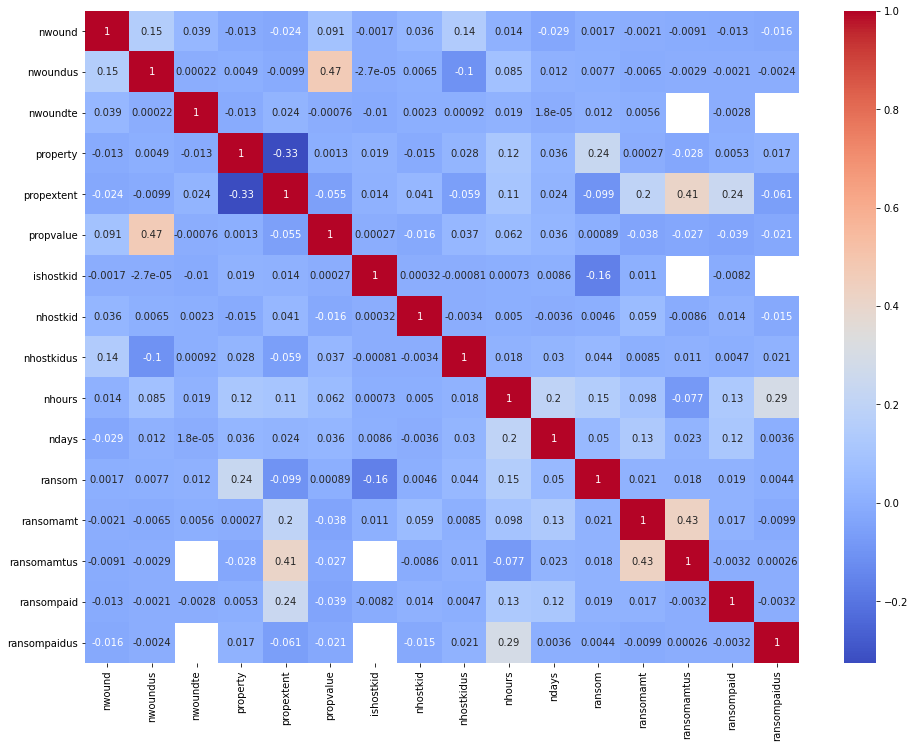

In [63]:
plt.figure(figsize=(16,12))
sns.heatmap(df6.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [64]:
#GROUP 7
df7 = df.iloc[:,121:136]
df7.head()

,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [65]:
df7.columns

Index(['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object')

In [66]:
df7.isna().sum()

ransomnote            181177
hostkidoutcome        170700
hostkidoutcome_txt    170700
nreleased             171291
addnotes              153402
scite1                 66191
scite2                104758
scite3                138175
dbsource                   0
INT_LOG                    0
INT_IDEO                   0
INT_MISC                   0
INT_ANY                    0
related               156653
dtype: int64

In [ ]:
#COLUMNS TO BE DROPPED
['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite2', 'scite3', 'related']

In [67]:
df7.corr()

,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
hostkidoutcome,1.000000,-0.555478,-0.015442,-0.016234,-0.119776,-0.061946
nreleased,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193
INT_ANY,-0.061946,0.064759,0.891051,0.893811,0.252193,1.000000


In [68]:
df7.nunique()

ransomnote              387
hostkidoutcome            7
hostkidoutcome_txt        7
nreleased               156
addnotes              15429
scite1                83988
scite2                62263
scite3                36090
dbsource                 26
INT_LOG                   3
INT_IDEO                  3
INT_MISC                  3
INT_ANY                   3
related               14306
dtype: int64

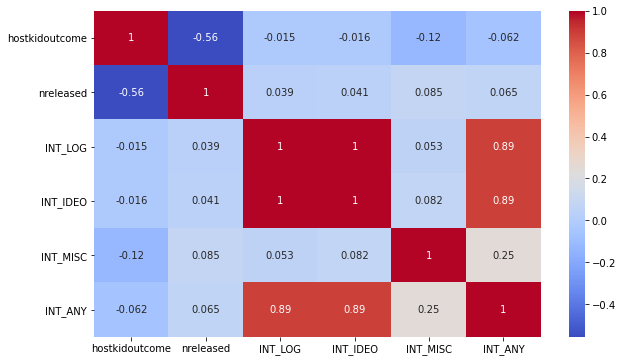

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(df7.corr(), cmap = 'coolwarm', annot = True)
plt.show()

# DATA CLEANING

In [82]:
#DROPPING OF REDUNDANT COLUMNS
df=  df.drop(columns= ['approxdate','resolution','location'])          

In [84]:
df=  df.drop(columns=['alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt'])

In [86]:
df=  df.drop(columns= ['targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname',
       'gname2'])

In [88]:
df=  df.drop(columns= ['gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'])

In [90]:
df=  df.drop(columns= ['weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt'])

In [92]:
df=  df.drop(columns= ['propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'])

In [94]:
df=  df.drop(columns= ['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite2', 'scite3', 'related'])

In [95]:
#CHECKING FOR NUMBER OF FEATURES
df.shape

(181691, 55)

In [96]:
#CHECKING FOR MISSING VALUES
df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
weaptype1               0
weaptype1_txt           0
weapsubtype1

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181691 non-null  object 
 10  city              181691 non-null  object 
 11  latitude          181691 non-null  float64
 12  longitude         181691 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           181691 non-null  object 
 16  crit1             18

In [117]:
df.count()

eventid             181691
iyear               181691
imonth              181691
iday                181691
extended            181691
country             181691
country_txt         181691
region              181691
region_txt          181691
provstate           181691
city                181691
latitude            181691
longitude           181691
specificity         181691
vicinity            181691
summary             181691
crit1               181691
crit2               181691
crit3               181691
doubtterr           181691
multiple            181691
success             181691
suicide             181691
attacktype1         181691
attacktype1_txt     181691
targtype1           181691
targtype1_txt       181691
corp1               181691
target1             181691
natlty1             181691
natlty1_txt         181691
gname               181691
guncertain1         181691
individual          181691
nperps              181691
nperpcap            181691
weaptype1           181691
w

In [118]:
#CHECKING FOR NUMBER OF ELEMENTS IN EACH UNIQUE FEATURE
df.nunique()

eventid             181691
iyear                   47
imonth                  13
iday                    32
extended                 2
country                205
country_txt            205
region                  12
region_txt              12
provstate             2854
city                 36674
latitude             48322
longitude            48039
specificity              5
vicinity                 3
summary             112493
crit1                    2
crit2                    2
crit3                    2
doubtterr                3
multiple                 2
success                  2
suicide                  2
attacktype1              9
attacktype1_txt          9
targtype1               22
targtype1_txt           22
corp1                33238
target1              86006
natlty1                215
natlty1_txt            216
gname                 3537
guncertain1              2
individual               2
nperps                 113
nperpcap                50
weaptype1               12
w

In [99]:
#CHECKING FOR THE DATA TYPE OF THE DATASET
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual            int64
nperps              float64
nperpcap            

# TREATING FOR MISSING VALUES

In [110]:
#TREATING FOR MISSING VALUES WITH OBJECT AS DATA TYPE
df['provstate'].fillna('Unknown',inplace=True)
df['city'].fillna('Unknown',inplace=True)
df['summary'].fillna('Unknown',inplace=True)
df['corp1'].fillna('Unknown',inplace=True)
df['target1'].fillna('Unknown',inplace=True)
df['natlty1_txt'].fillna('Unknown',inplace=True)
df['weapsubtype1_txt'].fillna('Unknown',inplace=True)
df['weapdetail'].fillna('Unknown',inplace=True)
df['scite1'].fillna('Unknown',inplace=True)

In [114]:
#TREATING FOR MISSING VALUES WITH FLOAT/INT AS DATA TYPE
#The following features will be treated my filling with their median values due to the features having high values as standard deviation compared to their mean values
df['latitude'].fillna(value=df['latitude'].median(), inplace=True)
df['longitude'].fillna(value=df['longitude'].median(), inplace=True)
df['specificity'].fillna(value=df['specificity'].median(), inplace=True)
df['doubtterr'].fillna(value=df['doubtterr'].median(), inplace=True)
df['multiple'].fillna(value=df['multiple'].median(), inplace=True)
df['natlty1'].fillna(value=df['natlty1'].median(), inplace=True)
df['guncertain1'].fillna(value=df['guncertain1'].median(), inplace=True)
df['nperps'].fillna(value=df['nperps'].median(), inplace=True)
df['nperpcap'].fillna(value=df['nperpcap'].median(), inplace=True)
df['weapsubtype1'].fillna(value=df['weapsubtype1'].median(), inplace=True)
df['nkill'].fillna(value=df['nkill'].median(), inplace=True)
df['nkillus'].fillna(value=df['nkillus'].median(), inplace=True)
df['nkillter'].fillna(value=df['nkillter'].median(), inplace=True)
df['nwound'].fillna(value=df['nwound'].median(), inplace=True)
df['nwoundus'].fillna(value=df['nwoundus'].median(), inplace=True)
df['nwoundte'].fillna(value=df['nwoundte'].median(), inplace=True)
df['ishostkid'].fillna(value=df['ishostkid'].median(), inplace=True)
#df['latitude'].fillna(value=df['latitude'].median(), inplace=True)
#df['latitude'].fillna(value=df['latitude'].median(), inplace=True)


In [115]:
df.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus             0
nkillter            0
nwound              0
nwoundus  

# DATA VISUALIZATION

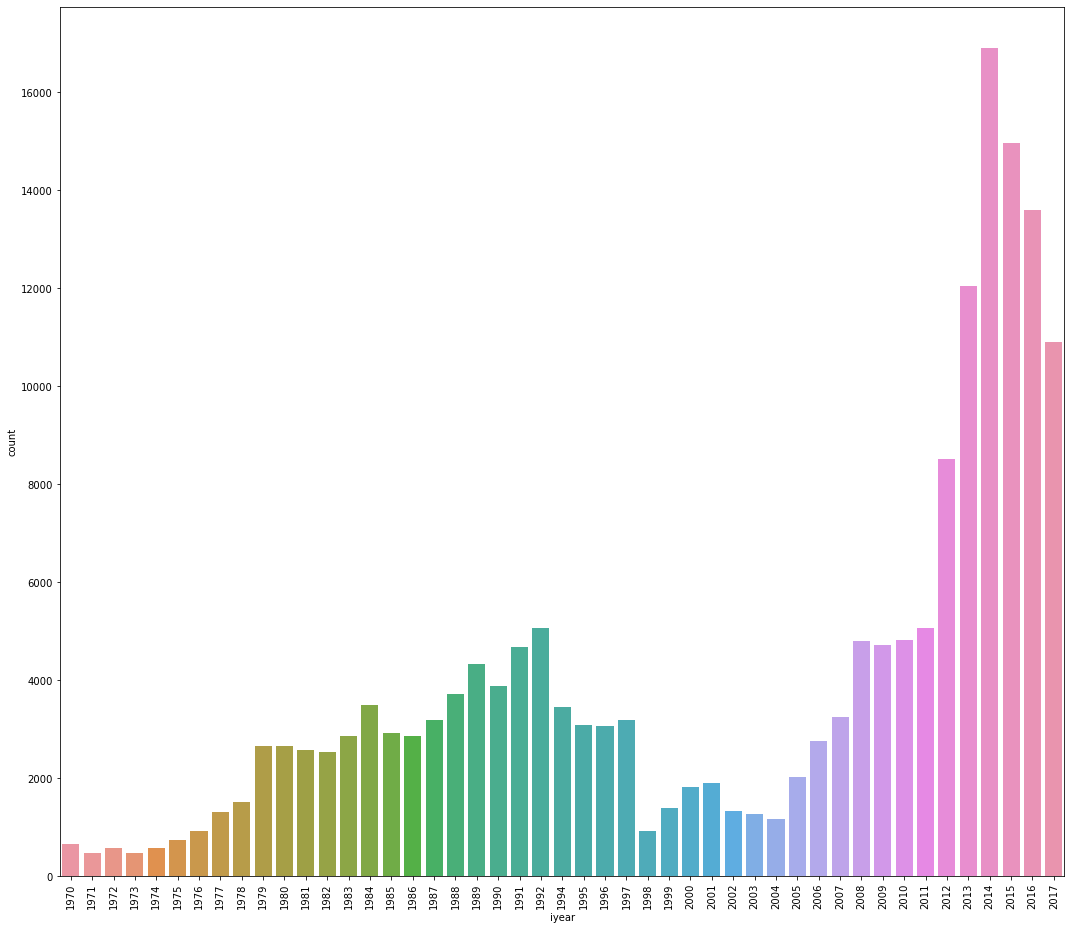

In [119]:
#YEAR
plt.figure(figsize=(18,16))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= df['iyear'].sort_values(), data= df)
plt.show()

In [ ]:
#FROM THE CHAT WE CAN SEE AS THE YEAR GOES BY THE RATE OF GLOBAL TERRORISM INCREASED
#WITH YEAR 2014 RECORDING THE HIGHEST RATE OF GLOBAL TERRORISM
#WHILE YEAR 1971 WITH THE LEAST RECORDED GLOBAL TERRORISM

In [142]:
#COUNTRY
country = pd.DataFrame(df.groupby('country_txt')['country'].size().sort_values(ascending=False))
country.columns = ['Count']
country_df = country.head(20)
country_df
#plt.figure(figsize=(18,16))
#plb.xticks(rotation= 90)
#plot1 = sns.countplot(x= 'country_df', data= df)
#plt.show()

,Count
country_txt,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


In [ ]:
#Iraq,Pakistan,Afghanistan lead as the countries with the highest reported cases of global terrorism

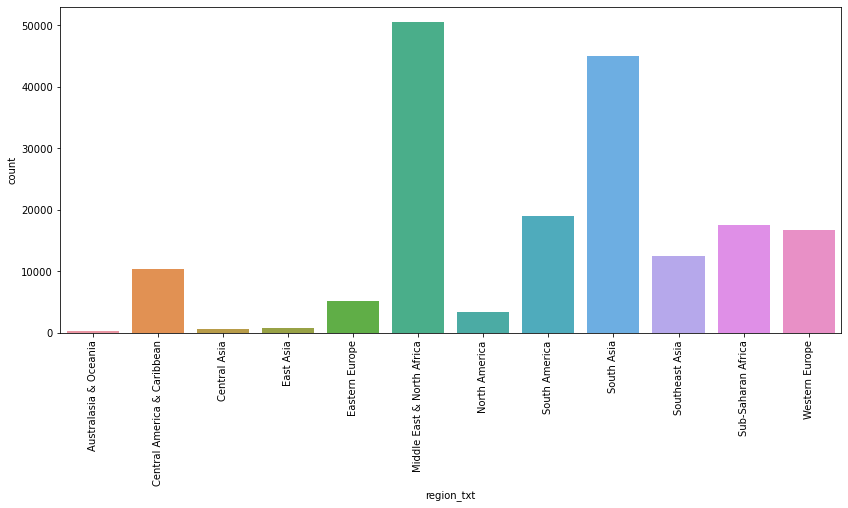

In [145]:
#REGION
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= df['region_txt'].sort_values(), data= df)
plt.show()

In [ ]:
#The regions with the most occurence of global terrorism are Middle East& North Africa and South Asia
#While Australasia and Oceania is the least region with terrorism attack

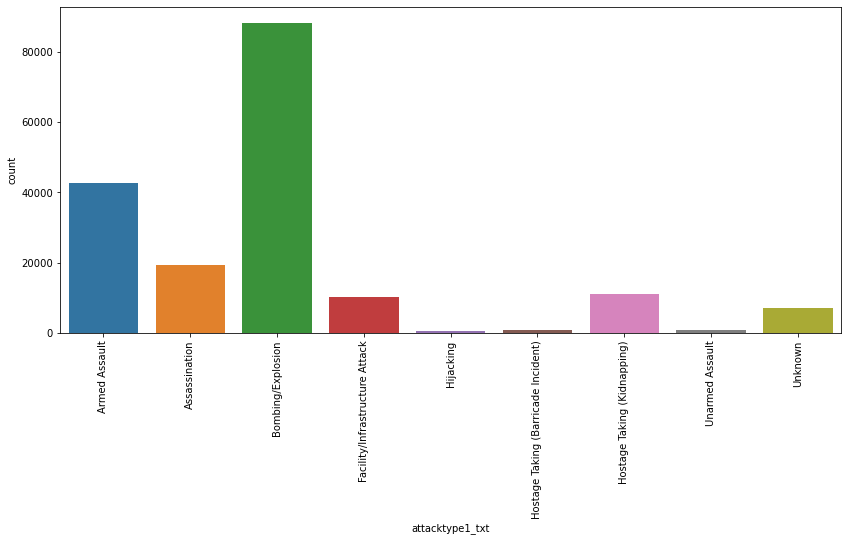

In [146]:
#ATTACK TYPE
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= df['attacktype1_txt'].sort_values(), data= df)
plt.show()

In [ ]:
#The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion followed by Armed Assault
#While Hijacking has been the least form used

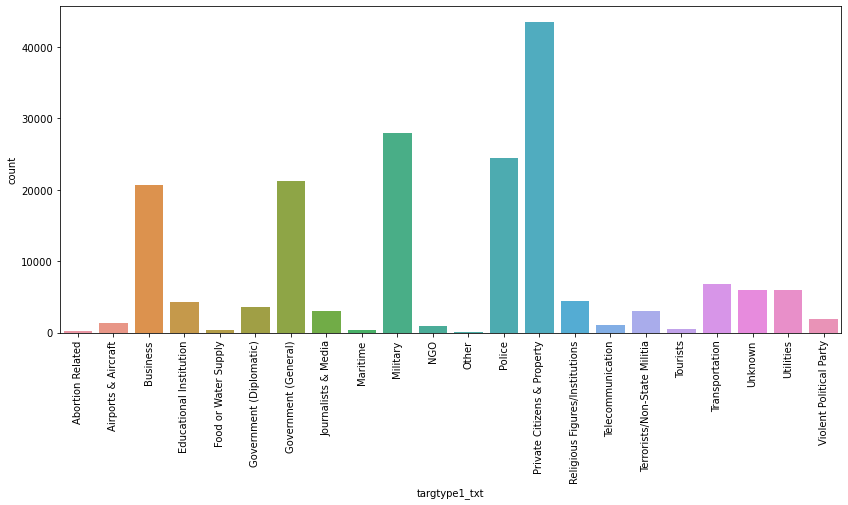

In [147]:
#Target Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= df['targtype1_txt'].sort_values(), data= df)
plt.show()

In [ ]:
#The most targeted area of global terrorism has been Private Citizens & Property followed by the Military and the Police 

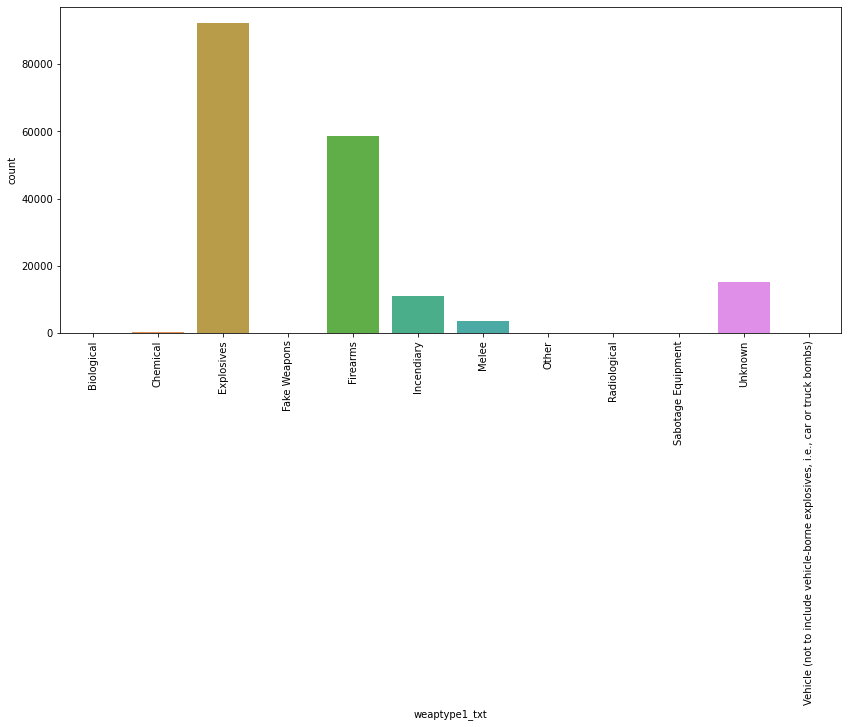

In [148]:
#Weapon Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= df['weaptype1_txt'].sort_values(), data= df)
plt.show()

In [ ]:
#Explosives and firearms constitute the most weapon used in global terrorism

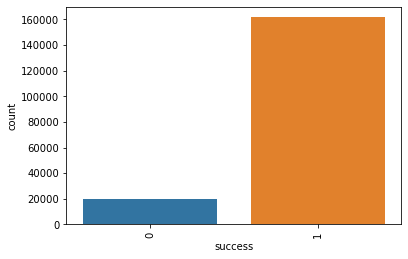

In [151]:
#Success in Attack
plt.figure(figsize=(6,4))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= df['success'].sort_values(), data= df)
plt.show()

In [154]:
#Deaths Toll
No_Deaths = pd.DataFrame(df.groupby('nkill')['region_txt'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.head(20)
No_Deaths_df

,Count
nkill,
1570.0,1
212.0,1
210.0,1
208.0,1
205.0,1
188.0,1
184.0,1
171.0,1
168.0,1


In [ ]:
#The highest record of death during an attck has the figure as 1570

In [156]:
No_Deaths = pd.DataFrame(df.groupby('region_txt')['nkill'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.head(20)
No_Deaths_df

,Count
region_txt,
Australasia & Oceania,282
Central Asia,563
East Asia,802
North America,3456
Eastern Europe,5144
Central America & Caribbean,10344
Southeast Asia,12485
Western Europe,16639
Sub-Saharan Africa,17550


In [ ]:
#Middle East& North Afican has recorded more cases of deaths from global terrorism followed by South Asia this also shows that the regions has had the highest occurence of global terrorism

# DATA PREPROCESSING